

*   Nama: Farhan
*   Email: farhanarafiq2401@gmail.com
*   Kota: Pontianak





In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-06-30 19:26:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.06MB/s    in 73s     

2021-06-30 19:27:22 (4.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os

In [4]:
# ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
!pip install split-folders

In [6]:
base_dir = '/tmp/rockpaperscissors'

In [7]:
import shutil
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images', ignore_errors=True)

In [8]:
import splitfolders
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.6,0.4))

Copying files: 2188 files [00:00, 4015.67 files/s]


In [9]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
os.listdir(train_dir)

['paper', 'scissors', 'rock']

In [11]:
os.listdir(train_dir)

['paper', 'scissors', 'rock']

In [12]:
# membuat direktori bentuk tangan batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

In [13]:
# membuat direktori bentuk tangan gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

In [14]:
# membuat direktori bentuk tangan kertas pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

In [15]:
# membuat direktori bentuk tangan batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [16]:
# membuat direktori bentuk tangan gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [17]:
# membuat direktori bentuk tangan kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [20]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [28]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
        )

Found 1312 images belonging to 3 classes.


In [29]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
        )

Found 876 images belonging to 3 classes.


In [30]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
            print("\nReached 96% accuracy") 
            self.model.stop_training = True 
     
callbacks = Callback()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [32]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
model.fit(
      train_generator,
      steps_per_epoch=41,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=27,
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/20
41/41 - 76s - loss: 0.1354 - accuracy: 0.9520 - val_loss: 0.0965 - val_accuracy: 0.9711
Epoch 2/20
41/41 - 76s - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.1053 - val_accuracy: 0.9699

Reached 96% accuracy


In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [36]:
uploaded = files.upload()

Saving Slide1.JPG to Slide1.JPG


Slide1.JPG
scissors


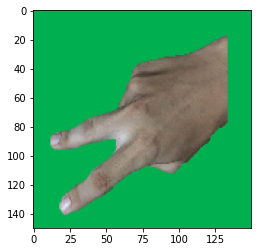

In [37]:
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')